### emnas_winner_1 (experiment 20)
* best result of emnas
* sequence: [8, 41, 8, 29, 21, 21, 38, 9, 34, 23, 29, 49]
* nas_acc: 0.849 nas_lat: 87.58 ms nas_reward: 0.9146 trained_acc: 0.9965
* model file generated by EMNAS
* Trained to get the actual accuracy

In [1]:
import numpy as np
import keras
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
plt.rcParams.update({'font.size': 14, 'mathtext.fontset': 'stix', 'font.family': 'STIXGeneral'})

In [3]:
batchSize = 6

In [4]:
model_epochs_full = 10
dataset_path_full = ".../dataset_openclose_678"

In [5]:
# [8, 41, 8, 29, 21, 21, 38, 9, 34, 23, 29, 49]
mobile = keras.models.load_model("model_files/emnas_winner__exp_20.h5")

In [6]:
mobile.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 64, 64, 32)        0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 32, 32, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 32, 32, 32)        0     

In [7]:
# datasets
dataGen = ImageDataGenerator(validation_split=0.1, 
                             preprocessing_function=keras.applications.mobilenet.preprocess_input)

trainBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='training')

validateBatch = dataGen.flow_from_directory(dataset_path_full, target_size=(128,128), batch_size=batchSize, subset='validation', shuffle=False)

Found 3893 images belonging to 2 classes.
Found 432 images belonging to 2 classes.


In [8]:
mobile.fit_generator(trainBatch, steps_per_epoch=len(trainBatch), validation_data=validateBatch, validation_steps=len(validateBatch), epochs=model_epochs_full)

/home/amirhossein/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
649/649 [==============================] - 193s 291ms/step - loss: 0.4618 - accuracy: 0.7832 - val_loss: 0.6246 - val_accuracy: 0.6528
Epoch 2/10
649/649 [==============================] - 221s 340ms/step - loss: 0.2698 - accuracy: 0.8942 - val_loss: 0.1207 - val_accuracy: 0.9722
Epoch 3/10
649/649 [==============================] - 223s 344ms/step - loss: 0.1730 - accuracy: 0.9391 - val_loss: 0.2923 - val_accuracy: 0.8611
Epoch 4/10
649/649 [==============================] - 224s 345ms/step - loss: 0.1364 - accuracy: 0.9471 - val_loss: 0.0974 - val_accuracy: 0.9653
Epoch 5/10
649/649 [==============================] - 224s 346ms/step - loss: 0.0955 - accuracy: 0.9687 - val_loss: 0.0875 - val_accuracy: 0.9722
Epoch 6/10
649/649 [==============================] - 225s 346ms/step - loss: 0.0668 - accuracy: 0.9777 - val_loss: 0.0356 - val_accuracy: 0.9884
Epoch 7/10
649/649 [==============================] - 226s 348ms/step - loss: 0.0566 - accuracy: 0.9812 - val_loss: 0.0426 -

In [17]:
# mobile.save("emnas_winner_1__trained_openclose_678.h5")

In [15]:
# plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='confusion_matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j], 
                horizontalalignment='center', 
                color='white' if cm[i,j] > thresh else 'black')
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[212   1]
 [  0 219]]


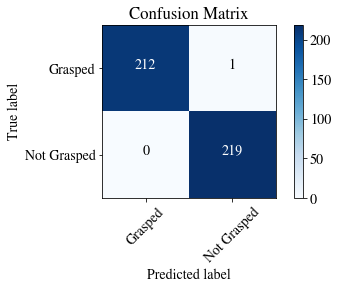

In [19]:
valLabels = validateBatch.classes
predictions = mobile.predict_generator(validateBatch, steps= len(valLabels)//batchSize+1)
cm = confusion_matrix(valLabels, predictions.argmax(axis=1))
cmPlotLabels = ['Grasped', 'Not Grasped']
plot_confusion_matrix(cm, cmPlotLabels, title='Confusion Matrix')

### Latency, accuracy - emnas_winner_1
* Predicted accuracy: 0.849
* Predicted latency: 87.58
* reward: 0.9146
* Measured latency: 95.05826